<a href="https://colab.research.google.com/github/robertoarturomc/Visualizacion/blob/main/5_Tipos_de_Graficos_Numericos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =  pd.read_csv("sample_data/california_housing_train.csv")
df.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# 5. Tipos de Graficos
## Variables Numericas

Cuando trabajabamos con variables categoricas, teniamos una "guia" que nos ayudaba a visualizar nuestros datos. No obstante, ahora que tenemos variables numericas, necesitamos idear formas para agrupar nuestros datos (de ser necesario) y poder visualizarlos, para poder encontrar patrones en ellos.

### Histogramas

Permiten darnos cuenta de dónde se concentran los datos de **una** sola variable. Los datos se agrupa en intervalos (cajas o bins), y se cuenta cuantas datos caen dentro de cada intervalo.

Una de sus ventajas es que no necesitan que hagamos cálculos! Son muy prácticos especialmente al principio del análisis, ya que podemos conocer las distribuciones.

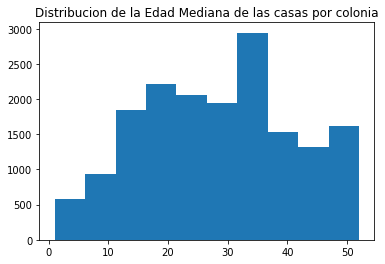

In [4]:
plt.hist(df.housing_median_age)
plt.title("Distribucion de la Edad Mediana de las casas por colonia")
plt.show()

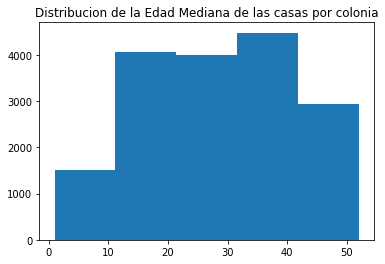

In [5]:
# Por default, Python crea 10 grupos. Peeeero, este número se puede modificar.
plt.hist(df.housing_median_age, bins=5)
plt.title("Distribucion de la Edad Mediana de las casas por colonia")
plt.show()

Encontrar el numero ideal de bins es algo subjetivo. Existen algunas formulas para calcular alguna opcion, pero muchas veces, prueba y error puede ser una buena opcion. Tener muchos puede hacer que vea falsos patrones en los datos, mientras que tener pocos puede hacer que me pierda de algun patron importante.

### Kernel Density Estimation Plot

Son graficos derivados de los Histogramas. No obstante, en este caso, se "suavizan" los valores, para poder observar mas facilmente la densidad.

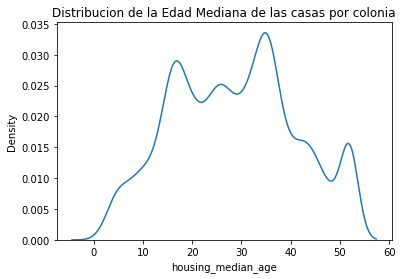

In [6]:
sns.kdeplot(df.housing_median_age)
plt.title("Distribucion de la Edad Mediana de las casas por colonia")
plt.show()

Al igual que en los histogramas y el numero de bins, hay que ajustar el numero de ancho de banda (*bandwidth*) para que no nos perdamos los patrones importantes. Escoger uno muy grande, por ejemplo, hace que pierda de vista la distribucion bimodal/trimodal (que tiene dos o tres puntos maximos), y parezca que solo hay un valor alrededor de donde se agrupan mis datos.

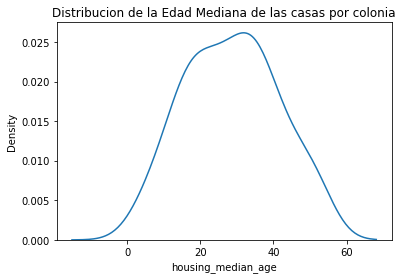

In [17]:
sns.kdeplot(df.housing_median_age, bw_adjust=3)
plt.title("Distribucion de la Edad Mediana de las casas por colonia")
plt.show()

Por cierto, ¿notaron como ahora ocupamos el paquete `seaborn`? Esta libreria esta construida sobre `matplotplib`, por lo que es compatible con la mayoria de sus funciones. Sus diferencias es que este paquete incluye varias graficas no incluidas por default en `matplotlib`, aunque no tiene la granularidad (la capacidad de hacer modificaciones muy especificas) a mis graficos.

De hecho, seaborn tambien puede hacer histogramas...

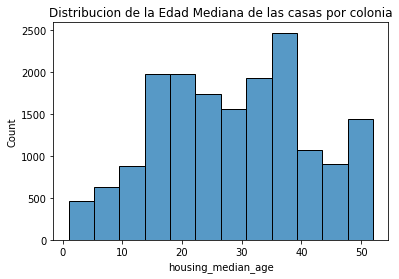

In [22]:
sns.histplot(df.housing_median_age, bins=12)
plt.title("Distribucion de la Edad Mediana de las casas por colonia")
plt.show()

E incluso, como alternativa, se pueden hacer Histogramas, KDE y otros graficos con la misma funcion...

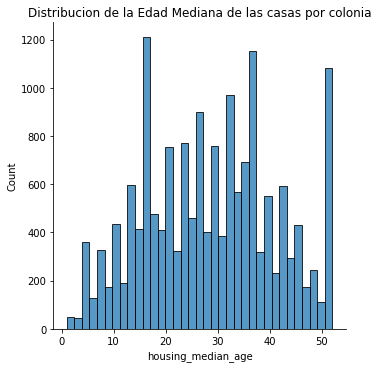

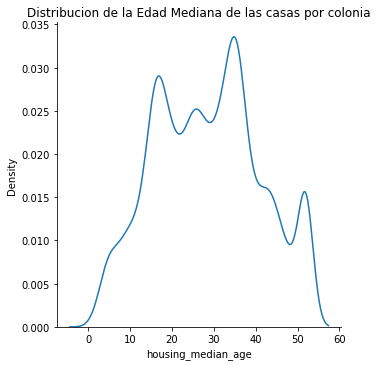

In [25]:
sns.displot(df, x="housing_median_age", kind="hist")
plt.title("Distribucion de la Edad Mediana de las casas por colonia")
plt.show()

sns.displot(df, x="housing_median_age", kind="kde")
plt.title("Distribucion de la Edad Mediana de las casas por colonia")
plt.show()

### Graficos de Dispersión/Puntos (Scatterplot)

Son el equivalente de Histogramas, pero para parejas de variables. Me dan una observación rápida de mis datos, especialmente si existiera una correlacion entre pares de variables, o para detectar valores extremos.


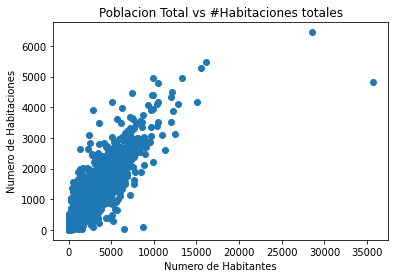

In [28]:
plt.scatter(df["population"],	df["total_bedrooms"])
plt.title("Poblacion Total vs #Habitaciones totales")
plt.xlabel("Numero de Habitantes")
plt.ylabel("Numero de Habitaciones")
plt.show()

¡Los puntos están más o menos sobre una misma línea! Eso significa que existe una alta correlación entre ambos valores (y puedo comprobarlo calculando alguna medida).

Recordatorio: ¡correlación no implica causalidad!

In [29]:
df[["population", "total_bedrooms"]].corr()

,population,total_bedrooms
population,1.000000,0.881169
total_bedrooms,0.881169,1.000000


Nota: ese tipo de gráficos son muy valiosos para detectar puntos con valores atípicos; estos pudieran ser debido a un error de medición, o ser valores reales, pero poco comunes.

Es parte del analista el decidir qué hacer con ellos. ¿hago como que no existen, y los borro? ¿Los reemplazo por algún valor que haga más sentido?

Todo depende del tipo de problema.

(Y por eso, es muy importante entender primero el problema, antes de aventarme a analizarlo).

### Grafico de Lineas

Permite, al igual que el grafico de dispersion, ver la relacion entre dos variables.
No obstante, cuando una de vlas variables numericas tiene "conexion", o cuando se trata de variables categoricas con ordinalidad (con un orden), puede ser mejor idea este tipo de grafico, para mostrar dicha conexion.

In [34]:
df2 = sns.load_dataset("flights")
df2.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [37]:
flights = df2.groupby("year")[["passengers"]].sum()\
                  .reset_index()
flights

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


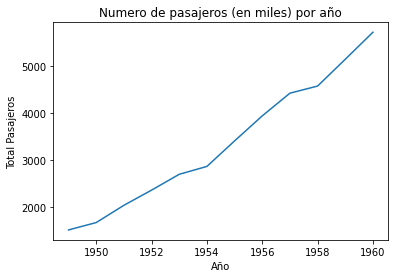

In [46]:
plt.plot("year", "passengers", data=flights) 
#plt.plot(flights["year"], flights["passengers"]) tambien funciona.

plt.title("Numero de pasajeros (en miles) por año")
plt.xlabel("Año")
plt.ylabel("Total Pasajeros")
plt.show()

Por cierto: notaras que el grafico en el eje Y esta incompleto: empieza a poartir del valor 1500 mas o menos. Normalmente, es muy mala idea hacer esto, ya que podemos distorsionar la escala de nuestros datos, ademas de que puede resultar engañoso (y hasta poco etico). Por fortuna, eso se puede ajustar con las funciones `xlim` y `ylim`.

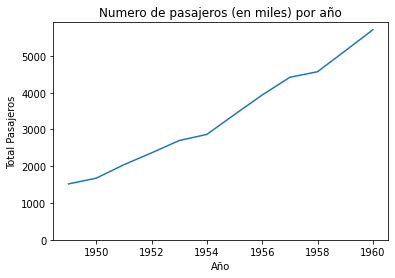

In [45]:
plt.plot("year", "passengers", data=flights)
plt.title("Numero de pasajeros (en miles) por año")
plt.xlabel("Año")
plt.ylabel("Total Pasajeros")

# Desde 0 y hasta un valor ligeramente mayor que el maximo
plt.ylim([0, max(flights["passengers"] + 200)])

plt.show()